In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import xgboost as xgb
import lightgbm as lgb
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [77]:
df = pd.read_csv('Lung Cancer Dataset.csv')
df.head(5)

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [78]:
df.shape

(5000, 18)

In [79]:
df.describe()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE
count,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,57.222800,0.501200,0.666400,0.6012,0.539800,0.516000,0.439200,55.032043,0.394800,0.80040,0.354200,0.698200,94.991029,0.600600,0.301800,0.204000,0.209600
std,15.799224,0.500049,0.471546,0.4897,0.498463,0.499794,0.496339,7.913083,0.488857,0.39974,0.478318,0.459085,1.481048,0.489824,0.459085,0.403009,0.407064
min,30.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,23.258308,0.000000,0.00000,0.000000,0.000000,89.923133,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,49.440685,0.000000,1.00000,0.000000,0.000000,93.973176,0.000000,0.000000,0.000000,0.000000
50%,57.000000,1.000000,1.000000,1.0000,1.000000,1.000000,0.000000,55.050421,0.000000,1.00000,0.000000,1.000000,94.974073,1.000000,0.000000,0.000000,0.000000
75%,71.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,60.323320,1.000000,1.00000,1.000000,1.000000,95.989272,1.000000,1.000000,0.000000,0.000000
max,84.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,83.046971,1.000000,1.00000,1.000000,1.000000,99.795786,1.000000,1.000000,1.000000,1.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [81]:
df.isnull().sum()

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64

In [82]:
for col in df.columns:
    if df[col].dtype in ['int64','float64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64

In [83]:
labelencoder = LabelEncoder()
df['PULMONARY_DISEASE'] = labelencoder.fit_transform(df['PULMONARY_DISEASE'])

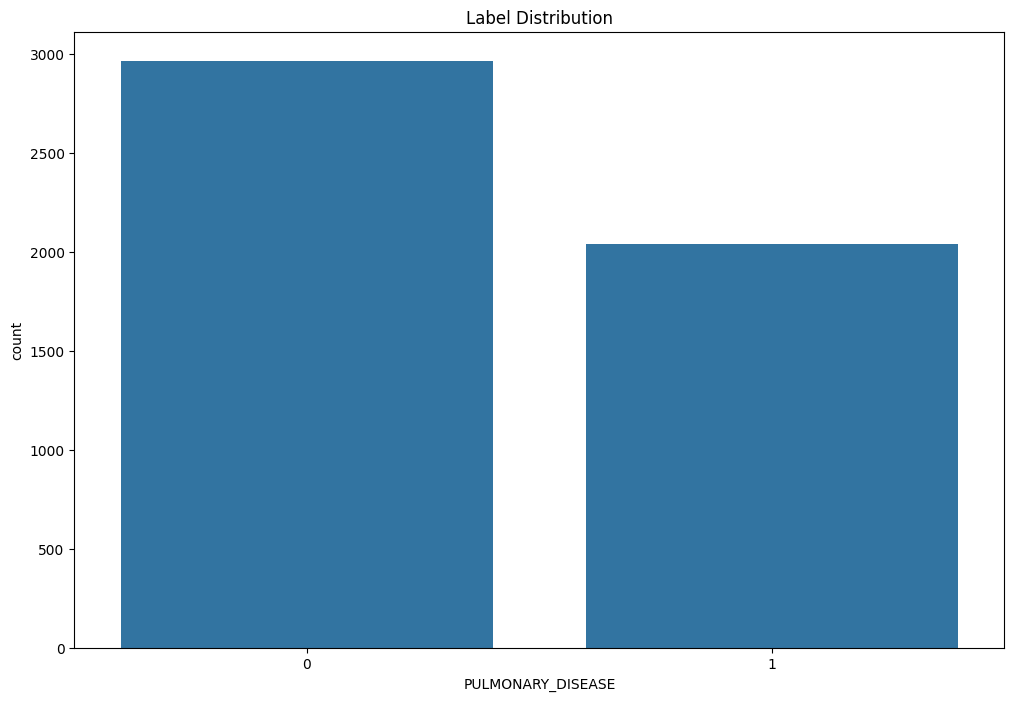

In [84]:
plt.figure(figsize=(12,8))
sns.countplot(x='PULMONARY_DISEASE',data=df)
plt.title('Label Distribution')
plt.show()

In [85]:
df.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1


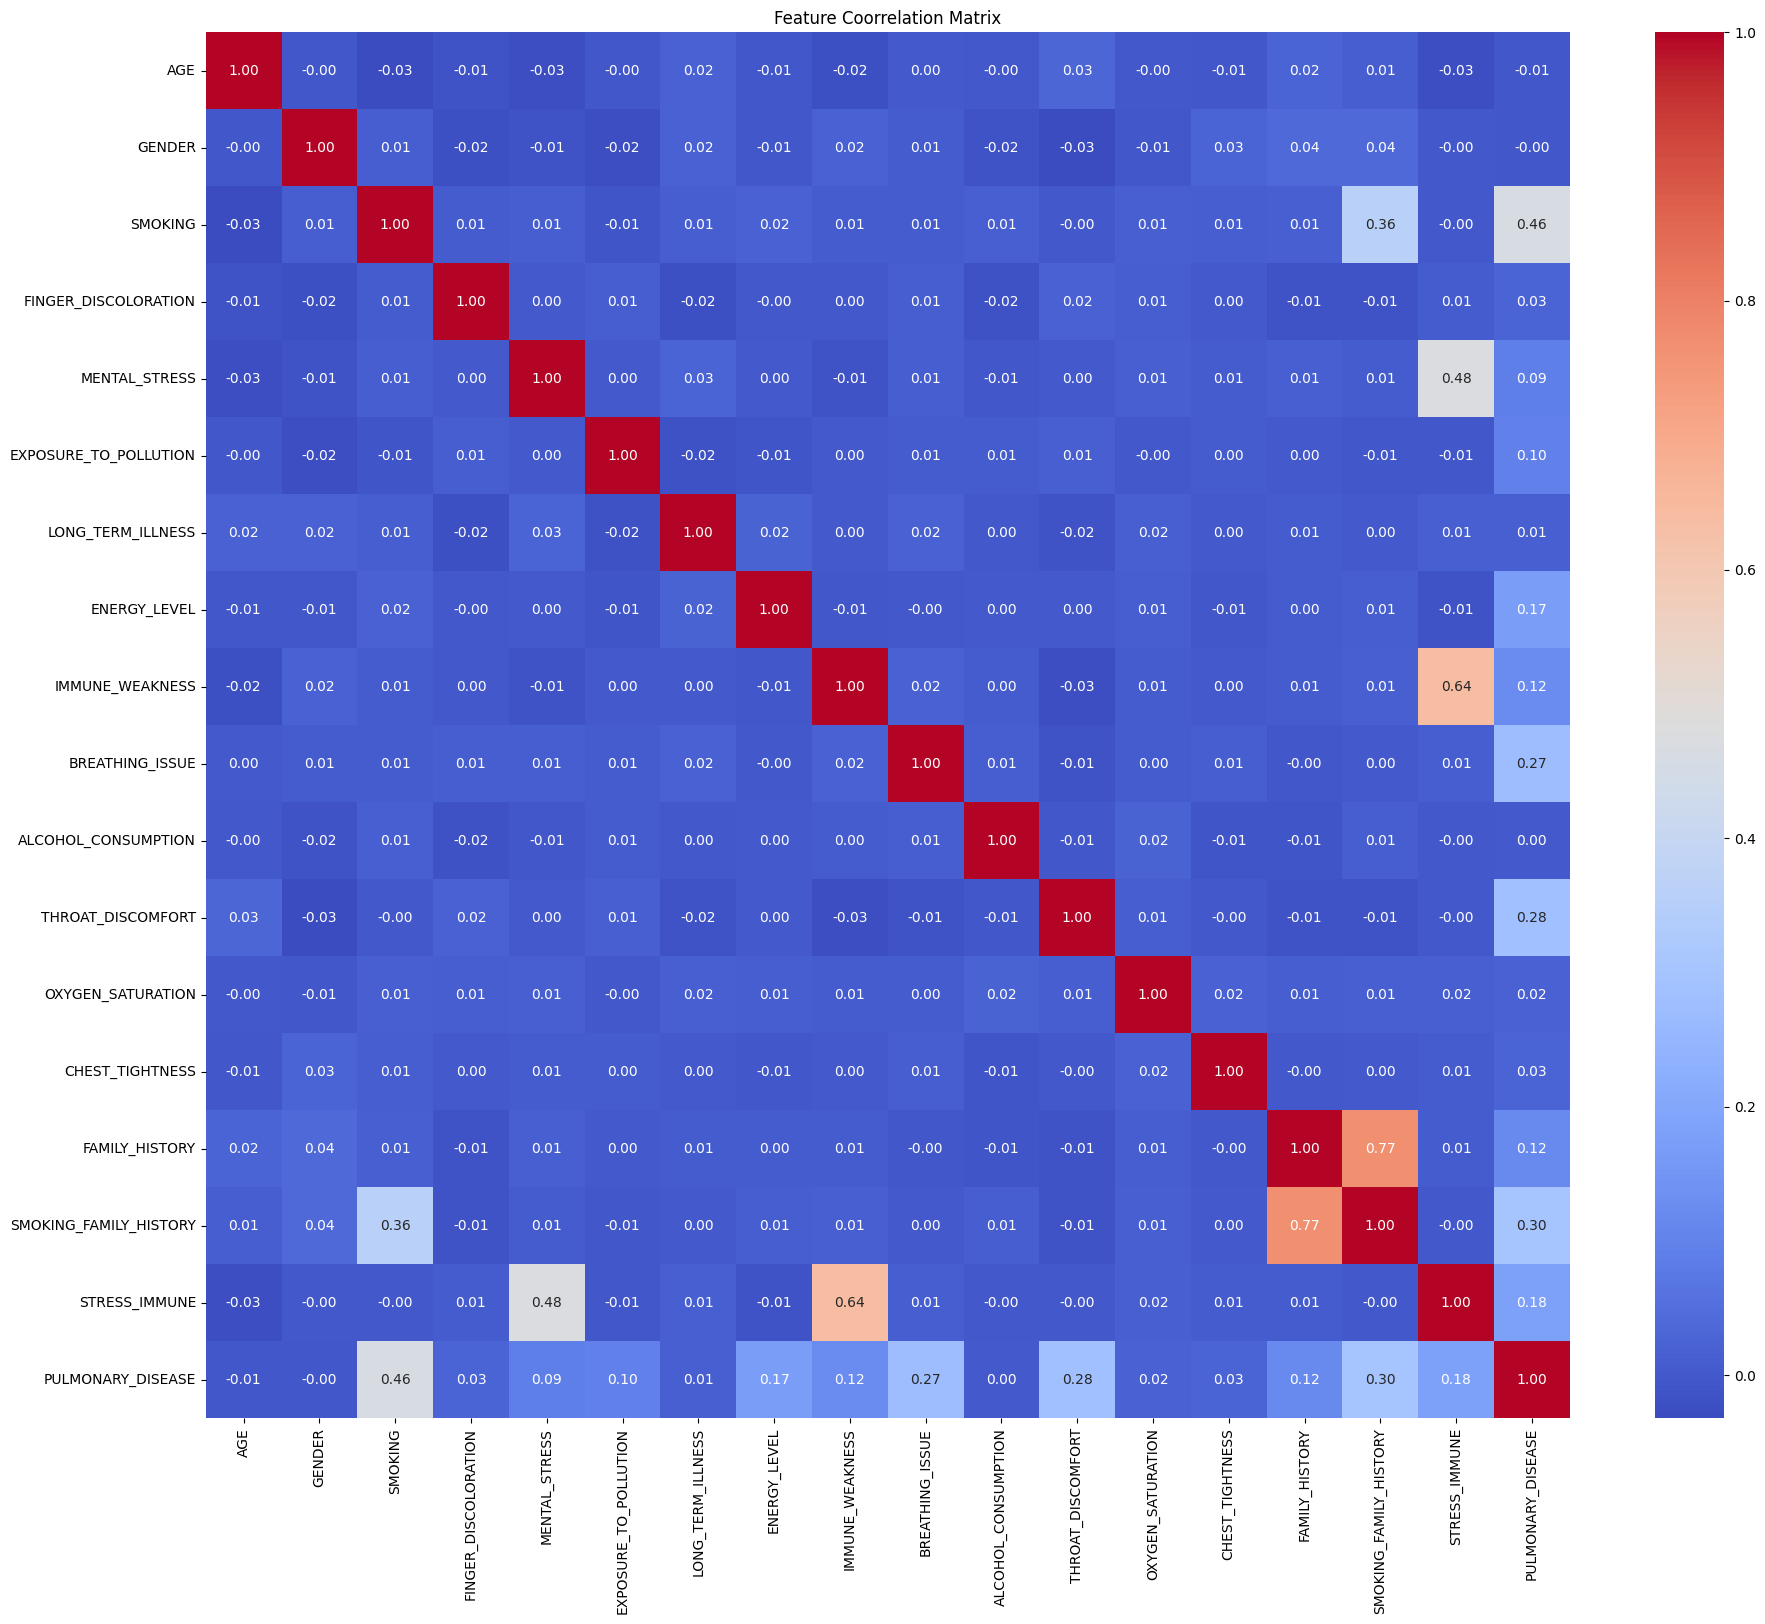

In [86]:
plt.figure(figsize=(22,18))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Feature Coorrelation Matrix')
plt.show()

In [87]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]

df.shape

(2472, 18)

In [88]:
X = df.drop('PULMONARY_DISEASE',axis='columns')
y = df['PULMONARY_DISEASE']

In [89]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [91]:
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    n_estimators=400,          # number of trees
    learning_rate=0.05,        # smaller → more gradual learning
    max_depth=5,               # depth of each tree (controls overfitting)
    subsample=0.8,             # use 80% of data per tree
    colsample_bytree=0.8,      # use 80% of features per tree
    reg_lambda=1,              # L2 regularization
    reg_alpha=0.2,             # L1 regularization
    gamma=0.2,                 # minimum loss reduction
    min_child_weight=3
    )
start_xgb = time.time()
xgb_model.fit(X_train, y_train)
xgb_time = time.time() - start_xgb
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_time

1.3140568733215332

In [92]:
xgb_acc

0.9158576051779935

In [93]:
lgb_model = lgb.LGBMClassifier(
    random_state=42,
    n_estimators=400,
    learning_rate=0.05,
    num_leaves=31,             # controls tree complexity
    max_depth=-1,              # unlimited depth, relies on num_leaves
    subsample=0.8,             # same as XGBoost's subsample
    colsample_bytree=0.8,
    reg_lambda=1,
    reg_alpha=0.2,
    min_child_samples=20
    )
start_lgb = time.time()
lgb_model.fit(X_train, y_train)
lgb_time = time.time() - start_lgb
lgb_pred = lgb_model.predict(X_test)
lgb_acc = accuracy_score(y_test, lgb_pred)
lgb_time

[LightGBM] [Info] Number of positive: 623, number of negative: 1231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 587
[LightGBM] [Info] Number of data points in the train set: 1854, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336030 -> initscore=-0.681036
[LightGBM] [Info] Start training from score -0.681036
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

0.3733680248260498

In [94]:
lgb_acc

0.9158576051779935

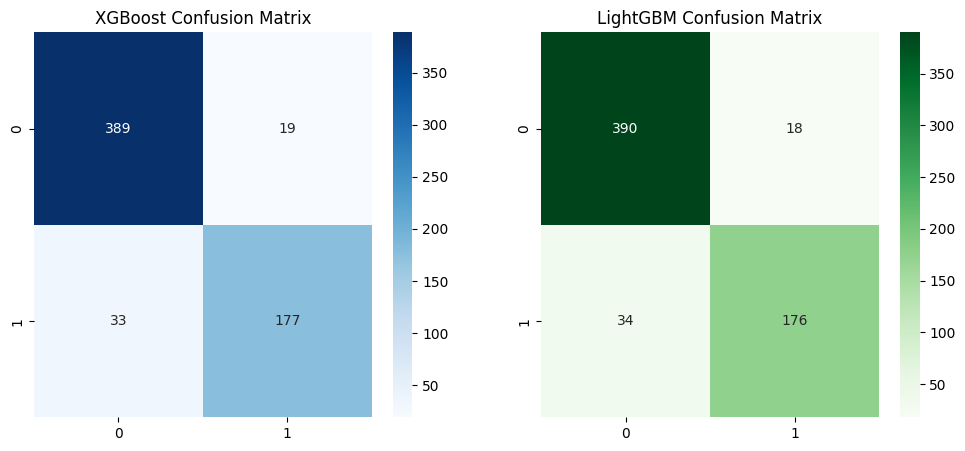

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("XGBoost Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, lgb_pred), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("LightGBM Confusion Matrix")
plt.show()

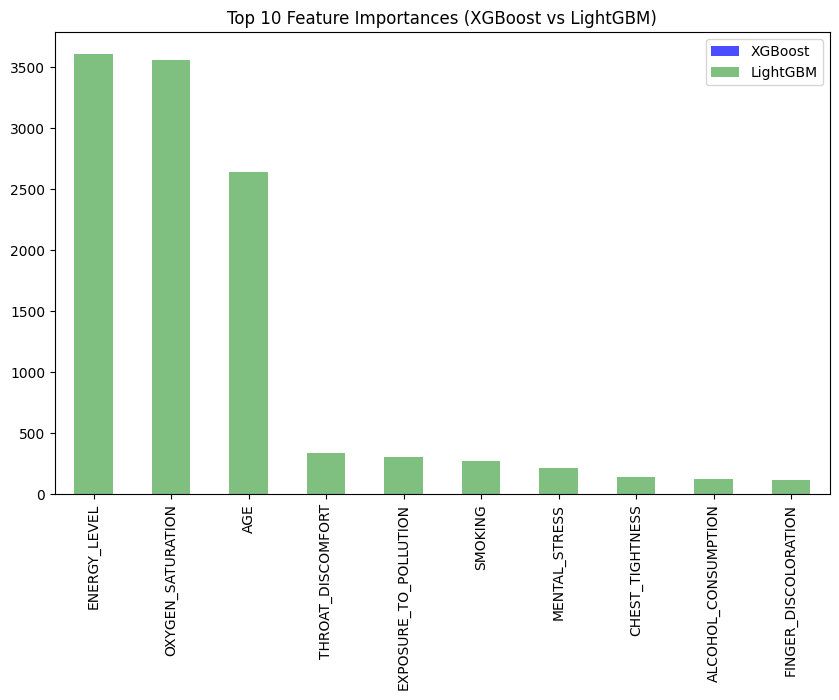

In [96]:
xgb_importance = pd.Series(xgb_model.feature_importances_, index=df.drop("PULMONARY_DISEASE", axis=1).columns)
lgb_importance = pd.Series(lgb_model.feature_importances_, index=df.drop("PULMONARY_DISEASE", axis=1).columns)

plt.figure(figsize=(10, 6))
xgb_importance.sort_values(ascending=False).head(10).plot(kind="bar", color="blue", alpha=0.7, label="XGBoost")
lgb_importance.sort_values(ascending=False).head(10).plot(kind="bar", color="green", alpha=0.5, label="LightGBM")
plt.title("Top 10 Feature Importances (XGBoost vs LightGBM)")
plt.legend()
plt.show()